# Environment setup

In [4]:
# pipeline.ipynb  — master orchestrator
# -------------------------------------------------------------
# Ensure the project root is on the Python path so we can import
# our local modules (feature_engineering.py, pca_baseline.py, clustering.py)
import sys, pathlib, os
from IPython.display import Image, display

# In Jupyter, just use the directory where the notebook lives
PROJECT_ROOT = pathlib.Path(os.getcwd()).resolve()
sys.path.append(str(PROJECT_ROOT))

DATA_DIR = PROJECT_ROOT / "data"
DATA_DIR.mkdir(exist_ok=True)

print("Project root:", PROJECT_ROOT)
print("Data dir:", DATA_DIR)


Project root: G:\School\Data Mining Techniques\CS6220_final_project
Data dir: G:\School\Data Mining Techniques\CS6220_final_project\data


# Run feature engineering

In [5]:
import feature_engineering  # must expose main()

parquet_path = DATA_DIR / "sp500_features.parquet"

if not parquet_path.exists():
    print("[INFO]   sp500_features.parquet not found — running feature engineering …")
    feature_engineering.main()
else:
    print("[SKIP]   Feature engineering already done.")

[INFO]   sp500_features.parquet not found — running feature engineering …
[INFO] Retrieving S&P 500 ticker list...
[INFO] Downloading 5y of price data for 503 tickers...
[INFO] Downloading 5y of price data for 503 tickers...
[INFO] Engineering features...
[INFO] Engineering features...
[DONE] Feature matrix saved -> g:\School\Data Mining Techniques\CS6220_final_project\data\sp500_features.csv (rows: 628,367)
[DONE] Feature matrix saved -> g:\School\Data Mining Techniques\CS6220_final_project\data\sp500_features.csv (rows: 628,367)


# Run PCA + log‑reg baseline


[STAGE]  PCA + baseline
====== Logistic Regression Baseline Metrics: ======
  accuracy: 0.6546
 precision: 0.5860
    recall: 0.6891
        f1: 0.6084
              precision    recall  f1-score   support

        down       0.44      0.73      0.55     16868
     neutral       0.87      0.62      0.73     78213
          up       0.45      0.71      0.55     18521

    accuracy                           0.65    113602
   macro avg       0.59      0.69      0.61    113602
weighted avg       0.74      0.65      0.67    113602

[RESULT] PCA Baseline: 
[PLOT]   pca_variance → g:\School\Data Mining Techniques\CS6220_final_project\figures/pca_variance.png
[PLOT]   confusion_matrix → g:\School\Data Mining Techniques\CS6220_final_project\figures/confusion_matrix.png
[PLOT]   logreg_roc → g:\School\Data Mining Techniques\CS6220_final_project\figures/logreg_roc.png
{'pca_variance': 'g:\\School\\Data Mining Techniques\\CS6220_final_project\\figures/pca_variance.png', 'confusion_matrix': 'g:\\S

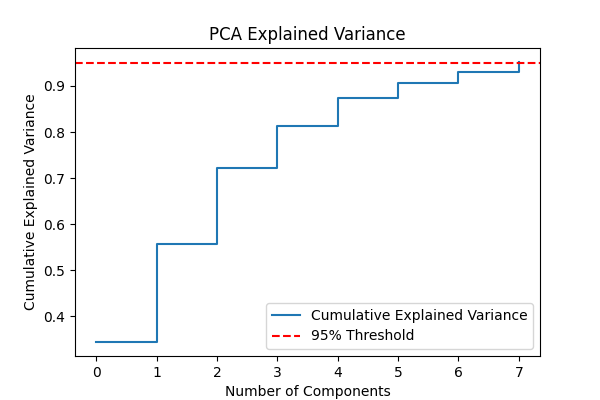

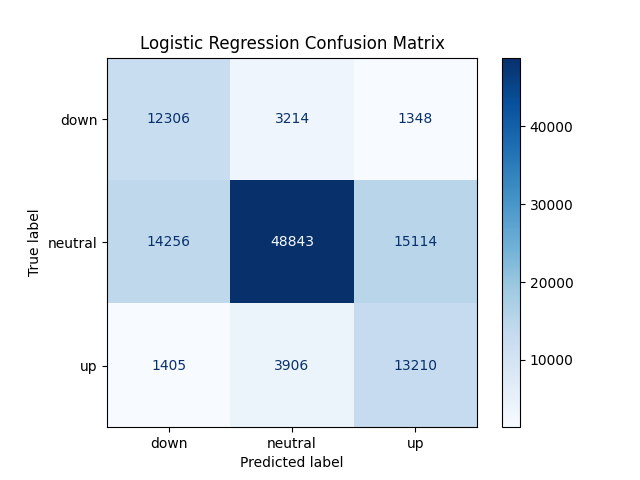

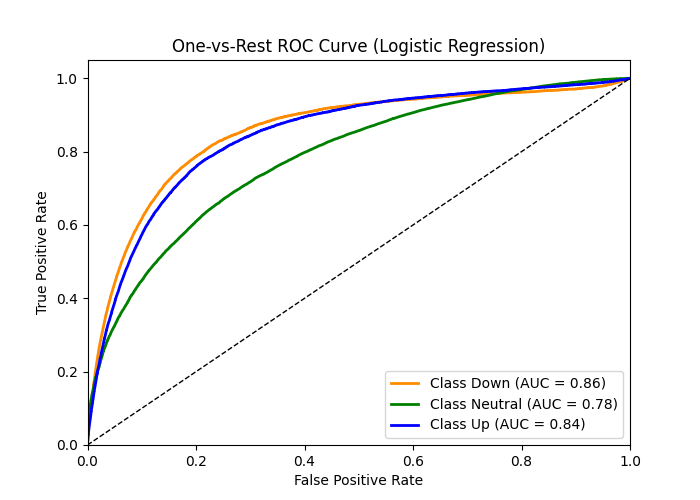

In [6]:
import pca_baseline  # must expose main()

print("\n[STAGE]  PCA + baseline")
plots = pca_baseline.main()   # prints metrics and writes data/pca_features.parquet (parquet for simplicity)

print("[RESULT] PCA Baseline: ")
for label, path in plots.items():
    print(f"[PLOT]   {label} → {path}")

print(plots)
display(Image(filename=plots['pca_variance']))
display(Image(filename=plots['confusion_matrix']))
display(Image(filename=plots['logreg_roc']))


[STAGE]  Random Forest baseline
[INFO] Fitting the model
[INFO] Fitting the model
[INFO] Complete
[INFO] Determining best threshold combination
[INFO] Complete
[INFO] Determining best threshold combination
[INFO] Best macro F1: 0.6446 at thresholds up=0.32499999999999996, down=0.32499999999999996
====== Random Forest Baseline Metrics: ======
  accuracy: 0.7456
 precision: 0.6608
    recall: 0.6095
        f1: 0.6308
[INFO] Best macro F1: 0.6446 at thresholds up=0.32499999999999996, down=0.32499999999999996
====== Random Forest Baseline Metrics: ======
  accuracy: 0.7456
 precision: 0.6608
    recall: 0.6095
        f1: 0.6308
              precision    recall  f1-score   support

        down       0.60      0.49      0.54     16868
     neutral       0.80      0.87      0.83     78213
          up       0.59      0.47      0.52     18521

    accuracy                           0.75    113602
   macro avg       0.66      0.61      0.63    113602
weighted avg       0.73      0.75      

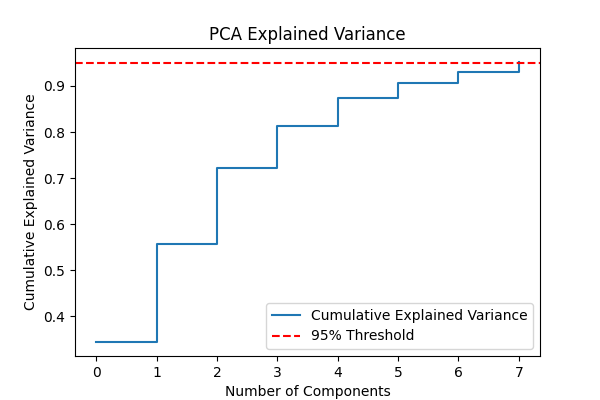

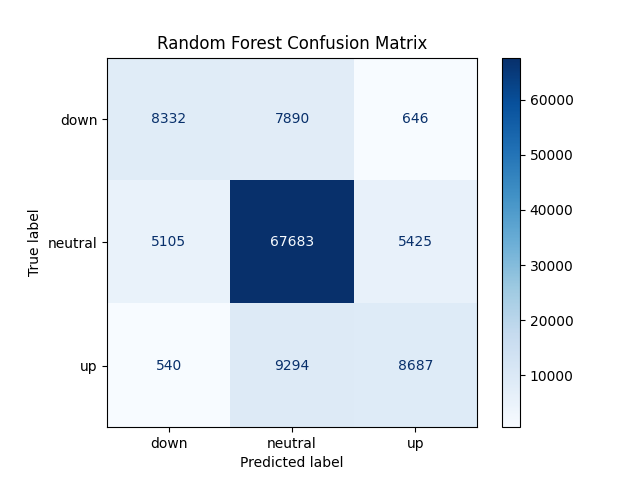

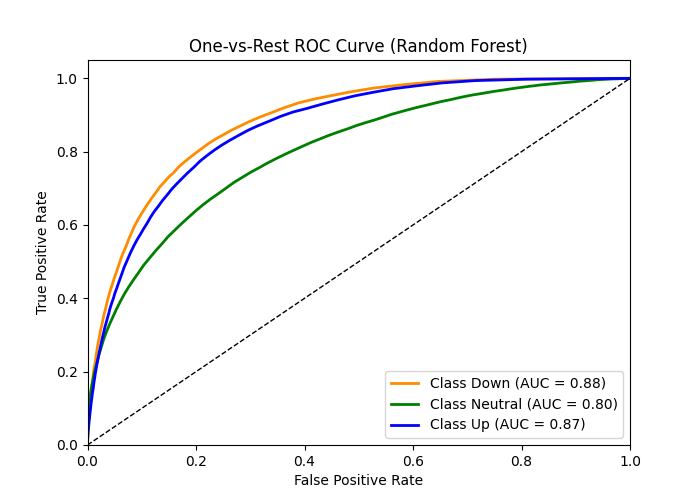

In [7]:
import rf_baseline  # must expose main()

print("\n[STAGE]  Random Forest baseline")
plots = rf_baseline.main()   # prints metrics and writes data/pca_features.parquet (parquet for simplicity)

print("[RESULT] Random Forest Baseline: ")
for label, path in plots.items():
    print(f"[PLOT]   {label} → {path}")

print(plots)
display(Image(filename=plots['pca_variance']))
display(Image(filename=plots['confusion_matrix']))
display(Image(filename=plots['logreg_roc']))

# Run clustering

In [ ]:
from clustering import run as clustering_run

print("\n[STAGE]  Clustering")
cluster_metrics, plots = clustering_run()

print("[RESULT] Clustering metrics:", cluster_metrics)
for label, path in plots.items():
    print(f"[PLOT]   {label} → {path}")

display(Image(filename=plots["elbow_plot"]))
display(Image(filename=plots["scatter_plot"]))


[STAGE]  Clustering


# Quick sanity check

In [ ]:
import pandas as pd

final_path = DATA_DIR / "cluster.parquet"
df_final = pd.read_parquet(final_path)
print(f"Final dataset shape: {df_final.shape}")
print(df_final.head())

# MLP Neural Network Classifier

In [ ]:
from mlp_classifier import train_and_evaluate
from IPython.display import Image, display

print("\n[STAGE]  MLP Neural Network Classifier")
metrics, report, plot_paths = train_and_evaluate()

print("[RESULT] MLP Performance Metrics:")
for metric, value in metrics.items():
    print(f"         {metric}: {value:.4f}")

print("[RESULT] Classification Report:")
print(f"         Class 0 (No significant increase) - Precision: {report['0']['precision']:.4f}, Recall: {report['0']['recall']:.4f}, F1: {report['0']['f1-score']:.4f}")
print(f"         Class 1 (Significant increase) - Precision: {report['1']['precision']:.4f}, Recall: {report['1']['recall']:.4f}, F1: {report['1']['f1-score']:.4f}")
print(f"         Overall Accuracy: {report['accuracy']:.4f}")

print("\n[PLOTS]  MLP Visualizations:")
for plot_type in plot_paths:
    print(f"         {plot_type}")

# Display all plots inline
display(Image(filename=plot_paths["training_history"]))
display(Image(filename=plot_paths["confusion_matrix"]))
display(Image(filename=plot_paths["loss_curve"]))
display(Image(filename=plot_paths["validation_scores"]))

# Pipeline Complete!

All stages have been executed successfully:

1. **Feature Engineering** - Generated comprehensive technical indicators
2. **PCA + Baseline** - Dimensionality reduction and logistic regression baseline  
3. **Clustering** - K-means clustering for market regime identification
4. **MLP Neural Network** - Deep learning classifier for stock movement prediction

All results, metrics, and visualizations are now available in one consolidated pipeline!